# Install requirements

In [1]:
# !pip install -r requirements.txt

# Import libraries

In [2]:
from Evaluation_function import Evaluate
import pandas as pd
from gensim.models import KeyedVectors, Word2Vec
from utilities import WordVecVectorizer

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minamelek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Evaluation Using Word2vec vectorization

(3831, 1)
Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.
Adding dictionaries ...  Done.
Visualizing ...


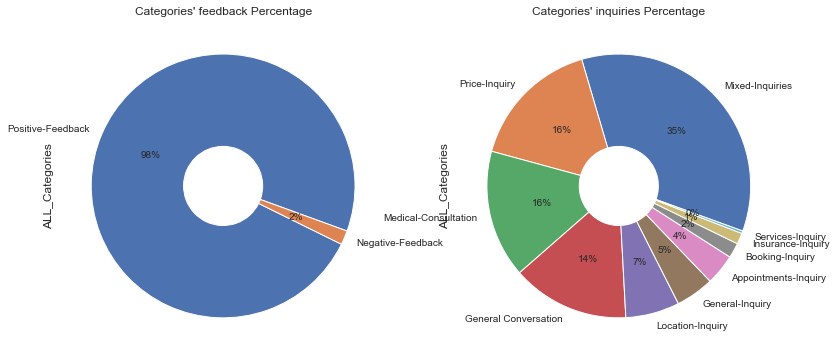

Visualizing ...


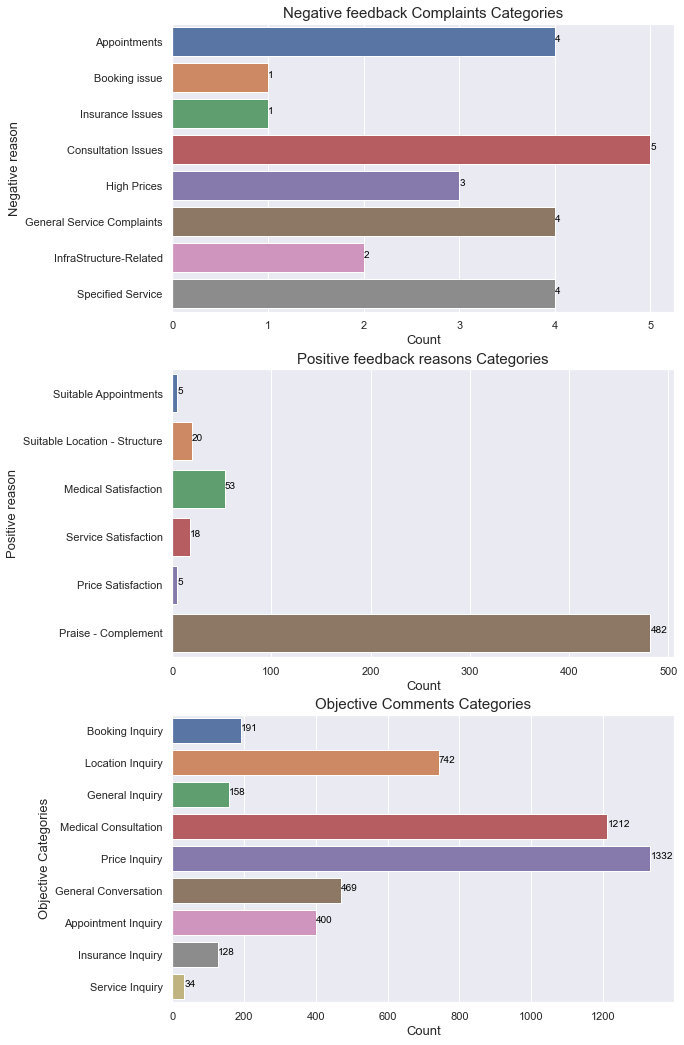

(3831, 6)


,message,cleaned,predicted,tags,inquiry,ALL_Categories
1542,بكام فرع القاهره,بكام فرع القاهره,obj,place-price-,1,Mixed-Inquiries
655,منور يا د عمرو مبارك ان شاء الله,منور يا د عمرو مبارك ان شاء الله,obj,,0,General Conversation
6,من فضلك ابني عنده 20سنة وعنده حبوب دهنية في وجه وفي ضهره من فضلك تنصحي بايه لو فيه أي علاج ياريت...,من فضلك ابني عنده 20سنة وعنده حبوب دهنية في وجه وفي ضهره من فضلك تنصحي بايه لو فيه اي علاج يا ري...,obj,Medical_consult-place-,1,Mixed-Inquiries
1448,ممكن مواعيد اندلسيه المعادي,ممكن مواعيد اندلسيه المعادي,obj,place-datetime-,1,Mixed-Inquiries
2502,دكتورنا الجميل متعك الله بالصحة والعافية والف شكر,دكتورنا الجميل متعك الله بالصحة والعافية والف شكر,pos,,0,Positive-Feedback
691,العنوان فين في مدينة نصر,العنوان فين في مدينة نصر,obj,place-,1,Location-Inquiry
3268,دكتور مجدى دكتور ممتاز والمستشفى اسمها حيعلى بيه,دكتور مجدي دكتور ممتاز والمستشفي اسمها حيعلي بيه,pos,,0,Positive-Feedback
3719,لسيد مدير المستشفى\nتحيه طيبه وبعد\nالموضوع أهمال جسيم بمستشفى السلامه القديمه\nنحيط سيادتكم علم...,لسيد مدير المستشفي تحيه طيبه وبعد الموضوع اهمال جسيم بمستشفي السلامه القديمه نحيط سيادتكم علما ب...,neg,Medical_consult-price-service-datetime-,1,Negative-Feedback
3697,ارجو تحديد موعد لإجراء الكشف الطبى,ارجو تحديد موعد لاجراء الكشف الطبي,obj,datetime-,1,Appointments-Inquiry
962,كنت عايزه اعرف تفاصيل عمليه انحراف الانف والسعر,كنت عايزه اعرف تفاصيل عمليه انحراف الانف والسعر,obj,Medical_consult-Booking-price-,1,Mixed-Inquiries


In [3]:
df = pd.read_csv('./data/data.csv')
print(df.shape)
eval = Evaluate(df)
transformed = eval.transform(vect_type="w2v", vect_path='./models/w2v_model.bin')
predictiones = eval.predict(input=transformed, model_name='FCNN_w2v_model')
eval.add_dicts()
eval.visualize(kind='pie')
eval.visualize(kind='bar')
Final_data = eval.get_data()
print(Final_data.shape)
Final_data.sample(10, random_state=262)

In [ ]:
# Loading the w2v model externally, instead of loading it everytime the function is called
#########################################################
print("Loading word2vec (Externally) ..", end=' ')
word2vec = KeyedVectors.load_word2vec_format('./models/w2v_model.bin', binary=True)
vect_model = WordVecVectorizer(word2vec)
print("Done.")
#########################################################
# eval.transform takes vect_model instead of vect_path
transformed_2 = eval.transform(vect_type="w2v", vect_model=vect_model) 


In [4]:
# Save prediction
Final_data.to_csv("./output/out.csv", index=False)

# Evaluation using a majority voting between 4 different models


1. Prediction using FCNN model with tfidf vectorization
Loading Tf-Idf model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.

2. Prediction using FCNN model with word2vec vectorization
Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.

3. Prediction using LSTM model with word2vec vectorization
Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.

4. Prediction using pretrained lexicons
Loading Lexicons ... 
Done.

Adding dictionaries ...  Done.
Visualizing ...


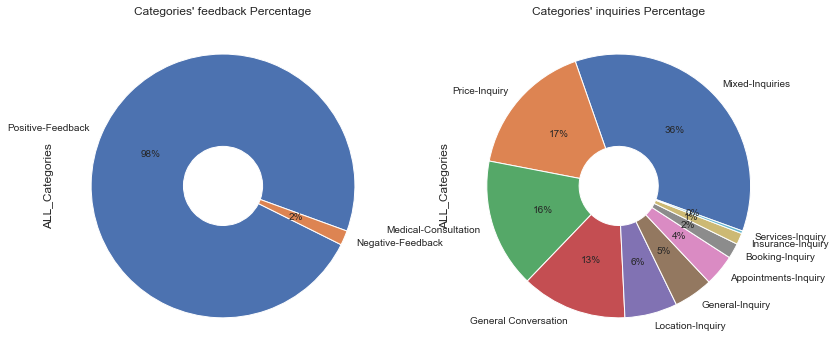

Visualizing ...


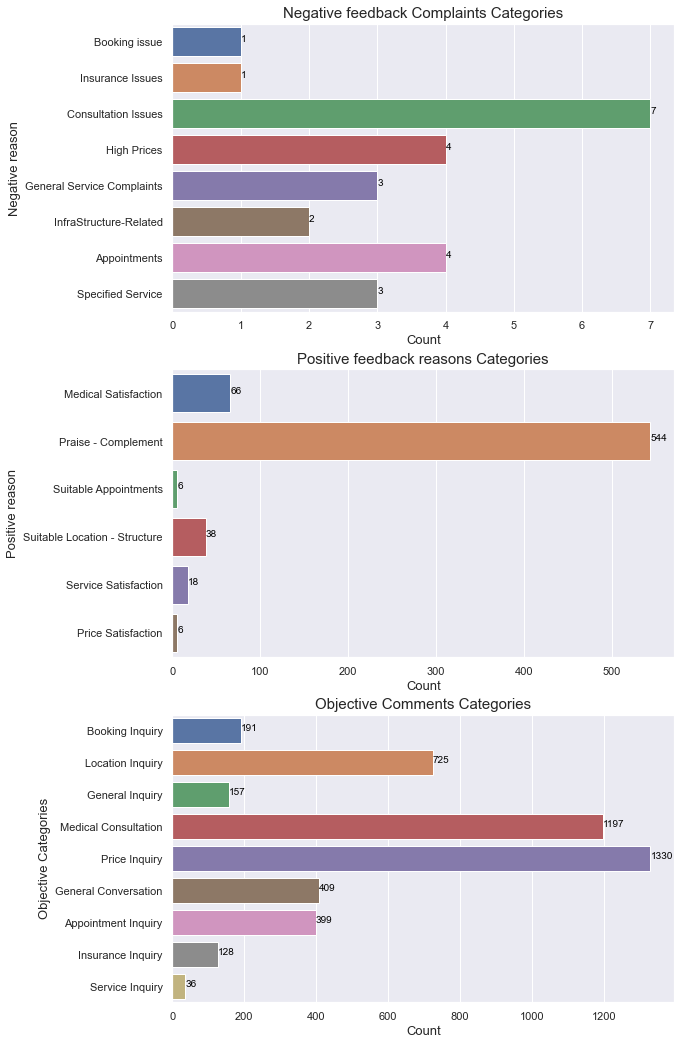

,message,cleaned,predicted,tags,inquiry,ALL_Categories
1542,بكام فرع القاهره,بكام فرع القاهره,obj,place-price-,1,Mixed-Inquiries
655,منور يا د عمرو مبارك ان شاء الله,منور يا د عمرو مبارك ان شاء الله,pos,,0,Positive-Feedback
6,من فضلك ابني عنده 20سنة وعنده حبوب دهنية في وجه وفي ضهره من فضلك تنصحي بايه لو فيه أي علاج ياريت...,من فضلك ابني عنده 20سنة وعنده حبوب دهنية في وجه وفي ضهره من فضلك تنصحي بايه لو فيه اي علاج يا ري...,obj,Medical_consult-place-,1,Mixed-Inquiries
1448,ممكن مواعيد اندلسيه المعادي,ممكن مواعيد اندلسيه المعادي,obj,place-datetime-,1,Mixed-Inquiries
2502,دكتورنا الجميل متعك الله بالصحة والعافية والف شكر,دكتورنا الجميل متعك الله بالصحة والعافية والف شكر,pos,,0,Positive-Feedback
691,العنوان فين في مدينة نصر,العنوان فين في مدينة نصر,obj,place-,1,Location-Inquiry
3268,دكتور مجدى دكتور ممتاز والمستشفى اسمها حيعلى بيه,دكتور مجدي دكتور ممتاز والمستشفي اسمها حيعلي بيه,pos,,0,Positive-Feedback
3719,لسيد مدير المستشفى\nتحيه طيبه وبعد\nالموضوع أهمال جسيم بمستشفى السلامه القديمه\nنحيط سيادتكم علم...,لسيد مدير المستشفي تحيه طيبه وبعد الموضوع اهمال جسيم بمستشفي السلامه القديمه نحيط سيادتكم علما ب...,neg,Medical_consult-price-service-datetime-,1,Negative-Feedback
3697,ارجو تحديد موعد لإجراء الكشف الطبى,ارجو تحديد موعد لاجراء الكشف الطبي,obj,datetime-,1,Appointments-Inquiry
962,كنت عايزه اعرف تفاصيل عمليه انحراف الانف والسعر,كنت عايزه اعرف تفاصيل عمليه انحراف الانف والسعر,obj,Medical_consult-Booking-price-,1,Mixed-Inquiries


In [5]:
from time import time

df = pd.read_csv('./data/data.csv')
t = []
t.append(time()) # Start time
# Initialization
eval = Evaluate(df, text_column='message')
t.append(time()) # init time
# Tfidf-based prediction
print("\n1. Prediction using FCNN model with tfidf vectorization")
predictiones = eval.predict(model_name='FCNN_tfidf_model') # "transformed" input done automaticlly at function call
t.append(time()) # tfidf time
# Word2vec-based prediction
print("\n2. Prediction using FCNN model with word2vec vectorization")
predictiones_2 = eval.predict(model_name='FCNN_w2v_model')
t.append(time()) # w2v time
# Word2vec-based prediction using lstm model
print("\n3. Prediction using LSTM model with word2vec vectorization")
predictiones_3 = eval.predict(model_name='FCNN_w2v_lstm_model')
t.append(time()) # lstm model time
# Lexicons-based prediction
print("\n4. Prediction using pretrained lexicons")
predictiones_4 = eval.predict(lexicon_prediction=True, lex_path='models/Full_lexicons.csv')
t.append(time()) # lex computing time
print()
# Objective categorization
eval.add_dicts()
t.append(time()) # dictionary computing time
# Visualization
eval.visualize(kind='pie')
eval.visualize(kind='bar')
t.append(time()) # Visualization time / End time

Final_data = eval.get_data()

Final_data.sample(10, random_state=262)

In [6]:
# Save prediction
Final_data.to_csv("./output/out_ensemble.csv", index=False)

## Time analysis

In [7]:
print("Time analysis:")
print("Full time taken: {:.2f} s".format(t[-1]-t[0]))
print("init time: {:.2f} s".format(t[1]-t[0]))
print("tfidf time: {:.2f} s".format(t[2]-t[1]))
print("w2v time: {:.2f} s".format(t[3]-t[2]))
print("w2v with lstm model time: {:.2f} s".format(t[4]-t[3]))
print("lex computing time: {:.2f} s".format(t[5]-t[4]))
print("dictionary computing time: {:.2f} s".format(t[6]-t[5]))
print("Visualization time: {:.2f} s".format(t[7]-t[6]))


Time analysis:
Full time taken: 36.96 s
init time: 0.64 s
tfidf time: 1.56 s
w2v time: 3.55 s
w2v with lstm model time: 26.79 s
lex computing time: 0.74 s
dictionary computing time: 1.88 s
Visualization time: 1.79 s
